# Chat Intents

## Topic Modeling - LDA

In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("max_colwidth", 400)

import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap

In [3]:
data_sample = pd.read_csv('data/processed/data_sample.csv')
data_sample.head()

,Unnamed: 0,text,category,cleaned_text
0,1024,I'm worried my card might be lost in the mail? How long does it usually take to arrive?,card_delivery_estimate,im worried card might lost mail long usually take arrive
1,9405,I got charged a fee that shouldn't be there from my cash,cash_withdrawal_charge,got charged fee shouldnt cash
2,9368,Do you charge for making a withdrawal? I took some money out of my account earlier and I was charged for this.,cash_withdrawal_charge,charge making withdrawal took money account earlier charged
3,3414,Is there an issue with my account? I don't see a cheque deposit that I made yesterday. Please assist.,balance_not_updated_after_cheque_or_cash_deposit,issue account dont see cheque deposit made yesterday please assist
4,7402,Are there ways for other people to send me money?,receiving_money,way people send money


## LDA

In [8]:
X = data_sample['cleaned_text']
X.head()

0              im worried card might lost mail long usually take arrive
1                                         got charged fee shouldnt cash
2           charge making withdrawal took money account earlier charged
3    issue account dont see cheque deposit made yesterday please assist
4                                                 way people send money
Name: cleaned_text, dtype: object

In [9]:
len(X)

1000

In [12]:
count_vectorizer = CountVectorizer(ngram_range = (1, 2), max_df = 900, min_df = 10)

transformed_vector = count_vectorizer.fit_transform(X)
transformed_vector.shape

(1000, 144)

In [14]:
feature_names = count_vectorizer.get_feature_names()
feature_names[0:10]

['able',
 'accept',
 'account',
 'ago',
 'already',
 'amount',
 'app',
 'atm',
 'back',
 'balance']

In [15]:
NUM_TOPICS = 10

lda_model = LatentDirichletAllocation(n_components = NUM_TOPICS, max_iter=20)

lda = lda_model.fit_transform(transformed_vector)
lda.shape

(1000, 10)

In [17]:
sum(lda[0])

1.0000000000000002

In [18]:
lda_model.components_.shape

(10, 144)

In [19]:
def print_topic(identifier, top_words=10):
    for topic_id, topic_word_probs in enumerate(lda_model.components_):
        if topic_id == identifier:
            print(f"Topic {topic_id}: ")
            
            top_feature_names = [feature_names[i] for i in topic_word_probs.argsort()[: -top_words - 1: -1]]
            
            print(" ".join(top_feature_names))

In [20]:
for i in range(NUM_TOPICS):
    print_topic(i, top_words=10)

Topic 0: 
transfer long take show long take bank pending cancel time come
Topic 1: 
money account im getting charge keep money account missing able friend
Topic 2: 
transaction cash topup using account make amount atm balance verification
Topic 3: 
card need new use want currency pin new card change tell
Topic 4: 
please help refund see account please help cant statement debit need
Topic 5: 
would like yet dont would like hasnt purchase know payment country
Topic 6: 
charged fee cash withdrawal atm cash withdrawal identity get extra mastercard
Topic 7: 
card get exchange rate exchange rate virtual virtual card disposable used wrong
Topic 8: 
top card working tried work pay going whats declined wont
Topic 9: 
payment card pending still app made time someone card payment go


In [21]:
topics = []

for i in range(len(X)):
    topics.append(lda[i].argmax())

In [22]:
data_sample['topic'] = topics

data_sample.head()

,Unnamed: 0,text,category,cleaned_text,topic
0,1024,I'm worried my card might be lost in the mail? How long does it usually take to arrive?,card_delivery_estimate,im worried card might lost mail long usually take arrive,0
1,9405,I got charged a fee that shouldn't be there from my cash,cash_withdrawal_charge,got charged fee shouldnt cash,6
2,9368,Do you charge for making a withdrawal? I took some money out of my account earlier and I was charged for this.,cash_withdrawal_charge,charge making withdrawal took money account earlier charged,1
3,3414,Is there an issue with my account? I don't see a cheque deposit that I made yesterday. Please assist.,balance_not_updated_after_cheque_or_cash_deposit,issue account dont see cheque deposit made yesterday please assist,2
4,7402,Are there ways for other people to send me money?,receiving_money,way people send money,1


In [24]:
tsne = TSNE(n_components = 2, init = 'pca', random_state = 0)
lda_2d_tsne = tsne.fit_transform(lda)
lda_df_tsne = pd.DataFrame(lda_2d_tsne)
lda_df_tsne.shape

(1000, 2)

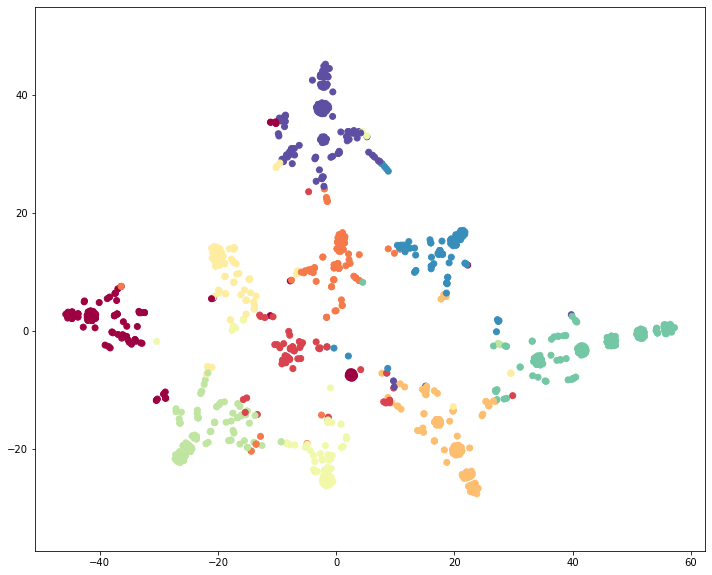

In [26]:
plt.subplots(figsize=(12, 10))
plt.axis('equal')

plt.scatter(lda_df_tsne[0], lda_df_tsne[1], c=data_sample['topic'], cmap = plt.cm.Spectral)

In [29]:
isomap = Isomap(n_neighbors = 20, n_components = 2)
lda_2d_isomap = isomap.fit_transform(lda)
lda_df_isomap = pd.DataFrame(lda_2d_isomap)

lda_df_isomap.head()

,0,1
0,0.229566,0.087404
1,-0.020455,-0.492816
2,-0.120148,-0.312966
3,-0.146764,-0.281766
4,-0.069624,0.020950


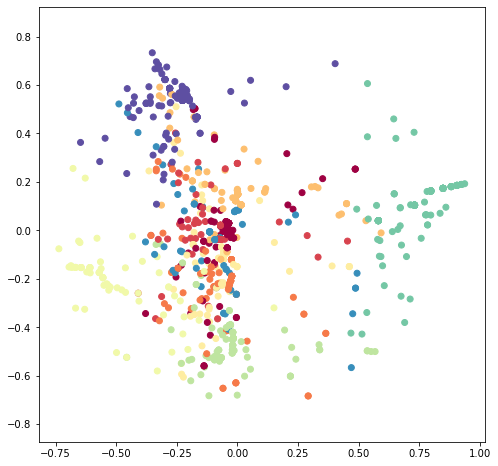

In [31]:
plt.subplots(figsize=(8,8))
plt.axis('equal')

plt.scatter(lda_df_isomap[0], lda_df_isomap[1], c = data_sample['topic'], cmap = plt.cm.Spectral) 

Add evaluation of topic models:
https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0